# Analyse

## Objectif
L'objectif est de permettre le suivi régulier des délais de règlement des factures :
- au niveau Entreprise, les factures émises par l'entreprise
- au niveau Expert Comptable, les factures émises par les entreprises suivies par le cabinet
- au niveau RCA, dégager des tendances

![image](../img/schema.png)

*Centralise ici les imports python dont tu as besoin :*

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Datasets : chargement

## Charge un dataframe nommé `dataset_df` avec les données du fichier `data/dataset.csv` créé lors de l'exercice précédent

In [2]:
dataset_df = pd.read_csv(r"../data/dataset.csv", parse_dates=["invoice_creation_date", "invoice_payment_date"])
dataset_df

,company_name,email,accountant_name,invoice_creation_date,invoice_payment_date,customer_name
0,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-09-15,2020-12-02,Corette Charon
1,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-07-05,2020-07-24,Ernesto Assinder
2,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-08-01,2020-09-15,Ardith Bavester
3,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-11-26,2020-11-05,Neila Scates
4,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-07-30,2020-10-24,Neila Scates
...,...,...,...,...,...,...
684,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-07-12,2020-07-20,Jan Stocker
685,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-07-11,2020-08-22,Elyssa Masarrat
686,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-10-09,2020-12-04,Whit Shadrack
687,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-10-31,2020-12-04,Rudolfo Jowers


## Existe t'il des valeurs manquantes ?

In [3]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company_name           689 non-null    object        
 1   email                  689 non-null    object        
 2   accountant_name        689 non-null    object        
 3   invoice_creation_date  689 non-null    datetime64[ns]
 4   invoice_payment_date   689 non-null    datetime64[ns]
 5   customer_name          689 non-null    object        
dtypes: datetime64[ns](2), object(4)
memory usage: 32.4+ KB


## Si oui, retire les lignes où ces valeurs sont absentes

# 2. Calcul du délai de reglement

## Ajoute une colonne nommée `delai_reglement` au dataframe `dataset` en t'appuyant sur les données déja présentes

In [4]:
dataset_df["delai_reglement"] = dataset_df["invoice_payment_date"] - dataset_df["invoice_creation_date"]
dataset_df["delai_reglement"] = dataset_df["delai_reglement"].astype('timedelta64[D]')

dataset_df

,company_name,email,accountant_name,invoice_creation_date,invoice_payment_date,customer_name,delai_reglement
0,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-09-15,2020-12-02,Corette Charon,78.0
1,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-07-05,2020-07-24,Ernesto Assinder,19.0
2,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-08-01,2020-09-15,Ardith Bavester,45.0
3,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-11-26,2020-11-05,Neila Scates,-21.0
4,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-07-30,2020-10-24,Neila Scates,86.0
...,...,...,...,...,...,...,...
684,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-07-12,2020-07-20,Jan Stocker,8.0
685,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-07-11,2020-08-22,Elyssa Masarrat,42.0
686,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-10-09,2020-12-04,Whit Shadrack,56.0
687,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-10-31,2020-12-04,Rudolfo Jowers,34.0


# 3. Statistiques descriptives

## Que peux-tu dire sur les délais de règlements ? (tu peux réaliser des graphes pour étayer ton propos)

Les délais de reglement suivent une loie normale centré en 0 (la moyenne et le median sont egaux a approximativement 0).

Les valeurs vont de -155 a 151, avec un median a -2, ce qui veut dire qu'approximativement la moitié des valeurs sont negatives, ce qui semblent contre intuitif puisque l'on s'attend a ce que la facture soit emise avant d'etre payé. 

Si les données etaient réelles on pourrait donner des hypotheses pour expliquer ca:
    1- Erreur de l'utilisateur lors de la saisie des valeurs (inversion des cases création et paiement de la facture), hypothese un peu improbable puisqu'elle sous entendrait une erreur superieur a 50% du temps.
    2- Les clients peuvent peut etre payé l'entreprise avant que la facture soit emise (a discuter avec les experts métiers).

In [5]:
dataset_df.describe()

,delai_reglement
count,689.000000
mean,-2.574746
std,64.537987
min,-155.000000
25%,-51.000000
50%,-2.000000
75%,42.000000
max,151.000000


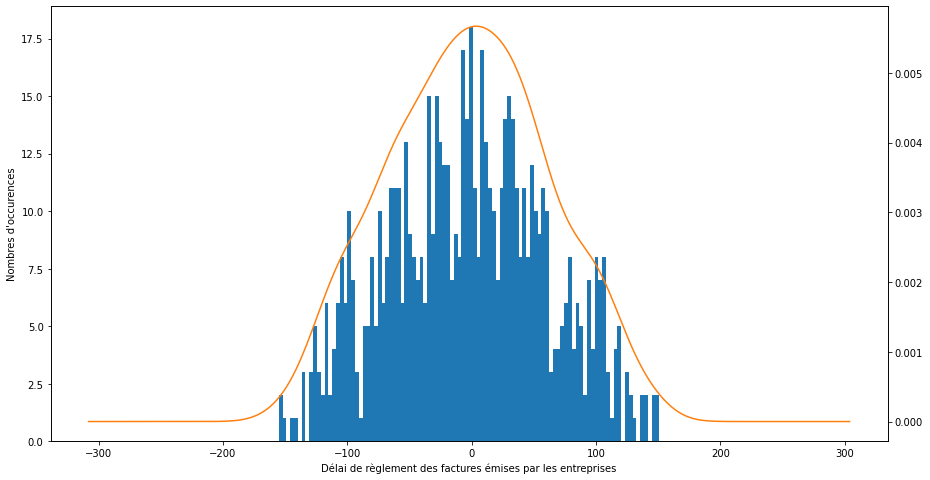

In [6]:
plt.figure(figsize = (15,8))

ax = dataset_df["delai_reglement"].hist(bins=100)
dataset_df["delai_reglement"].plot(kind='kde', ax=ax, secondary_y=True)

ax.set(xlabel="Délai de règlement des factures émises par les entreprises")
ax.set(ylabel="Nombres d'occurences");

# 4. Correction des délais de règlements, si négatif alors mise à 0 par défaut

## Corrige la colonne `delai_reglement` pour que la valeur soit égale à 0 si les délais sont négatifs

In [7]:
dataset_df.loc[dataset_df["delai_reglement"] < 0, "delai_reglement"] = 0
dataset_df

,company_name,email,accountant_name,invoice_creation_date,invoice_payment_date,customer_name,delai_reglement
0,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-09-15,2020-12-02,Corette Charon,78.0
1,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-07-05,2020-07-24,Ernesto Assinder,19.0
2,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-08-01,2020-09-15,Ardith Bavester,45.0
3,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-11-26,2020-11-05,Neila Scates,0.0
4,"Larson, Hilpert and Hegmann",cstiller2@ca.gov,Catarina Stiller,2020-07-30,2020-10-24,Neila Scates,86.0
...,...,...,...,...,...,...,...
684,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-07-12,2020-07-20,Jan Stocker,8.0
685,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-07-11,2020-08-22,Elyssa Masarrat,42.0
686,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-10-09,2020-12-04,Whit Shadrack,56.0
687,Botsford-Boyle,glevens8@microsoft.com,Gerhardt Levens,2020-10-31,2020-12-04,Rudolfo Jowers,34.0


# 5. Analyse des délais de règlements

## Propose une ou plusieurs visualisation permettant d'apporter des informations pertinentes sur les délais de paiement

Les délaies de paiement sont payés majoritairement dans les 60 premiers jours apres l'emission de la facture (durée maximal légal avant d'avoir des pénalités de retard) et diminue avec le temps.

Si on analyse les données au niveau de la moyenne pour chaques clients, on remarque que certains clients paient toujours rapidement tandis que d'autres sont bcp plus frequemment en retard. La repartitions des clients suit elle aussi une distribution normal (centré approximativement vers 30 jours).

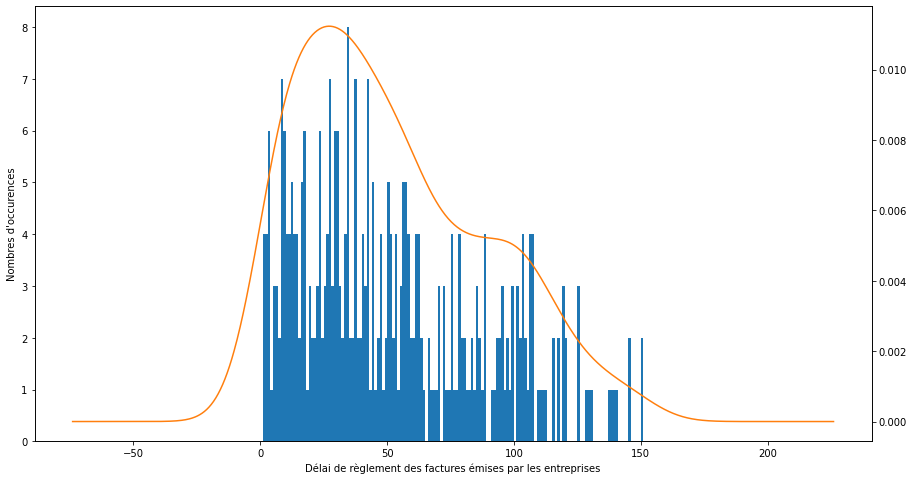

In [8]:
plt.figure(figsize = (15,8))

df = dataset_df[dataset_df["delai_reglement"] > 0]["delai_reglement"]
ax = df.hist(bins=150)
df.plot(kind='kde', ax=ax, secondary_y=True)

ax.set(xlabel="Délai de règlement des factures émises par les entreprises")
ax.set(ylabel="Nombres d'occurences");

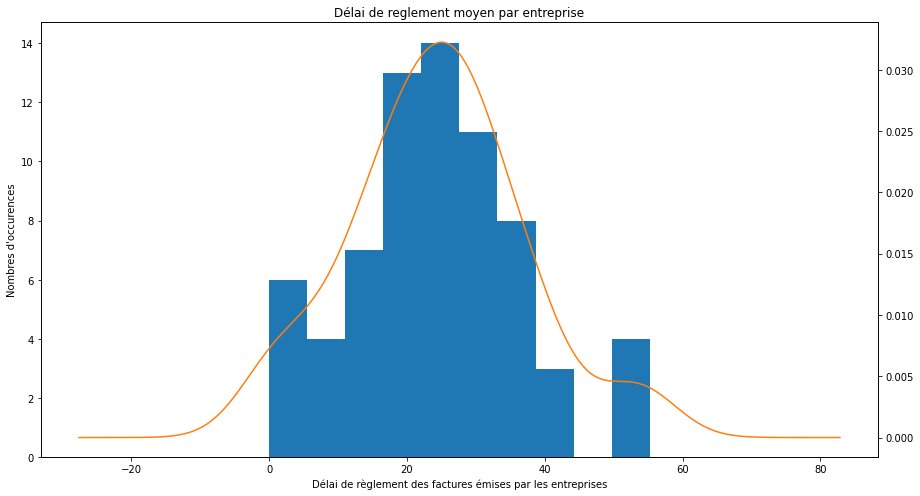

In [9]:
plt.figure(figsize = (15,8))

df = dataset_df.groupby('customer_name')["delai_reglement"].mean()
ax = df.plot(kind='hist')
df.plot(kind='kde', ax=ax, secondary_y=True)

ax.set(xlabel="Délai de règlement des factures émises par les entreprises")
ax.set(ylabel="Nombres d'occurences")

plt.title("Délai de reglement moyen par entreprise");

# 6. Tendances

# Propose visualisation affichant l'évolution mensuelle du délai de règlement moyen des factures émises par l'entreprise: `Larson, Hilpert and Hegmann`

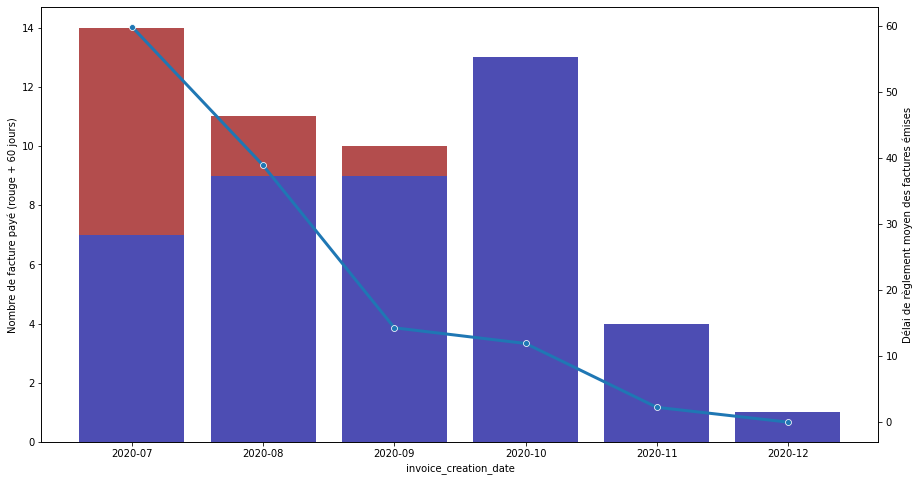

In [10]:
df = dataset_df.loc[dataset_df["company_name"] == "Larson, Hilpert and Hegmann"]

count_df = df.groupby(df["invoice_creation_date"].dt.to_period("M"))["delai_reglement"].agg(
    {("en delai", lambda x: len(x[x<60])), ("hors delai", "count")})
count_df = count_df.reset_index()

df3 = df.groupby(df["invoice_creation_date"].dt.to_period("M"))["delai_reglement"].agg("mean")
df3 = df3.reset_index()

plt.figure(figsize = (15,8))

ax = sns.barplot(
    x="invoice_creation_date", y="hors delai", data=count_df, color='red', saturation=0.4, label="hors delai")
sns.barplot(x="invoice_creation_date", y="en delai", data=count_df, color='blue', saturation=0.4, label="Positive")
ax.set(ylabel='Nombre de facture payé (rouge + 60 jours)')
ax2 = plt.twinx()
ax2.set(ylabel='Délai de règlement moyen des factures émises')

sns.lineplot(data=df3.delai_reglement, linewidth = 3, marker="o", ax=ax2);

# Propose visualisation affichant l'évolution mensuelle du délai de règlement moyen des factures émises par les entreprises suivies par l'expert comptable: `nborrington0@hubpages.com`

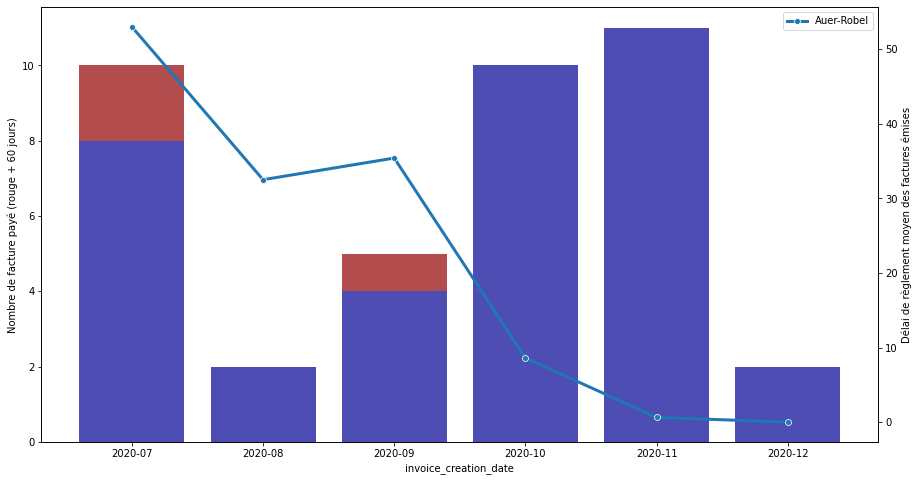

In [11]:
df = dataset_df.loc[dataset_df["email"] == "nborrington0@hubpages.com"]

count_df = df.groupby(df["invoice_creation_date"].dt.to_period("M"))["delai_reglement"].agg(
    {("en delai", lambda x: len(x[x<60])), ("hors delai", "count")})
count_df = count_df.reset_index()

df3 = df.groupby(df["invoice_creation_date"].dt.to_period("M"))["delai_reglement"].agg("mean")
df3 = df3.reset_index()

plt.figure(figsize = (15,8))

ax = sns.barplot(
    x="invoice_creation_date", y="hors delai", data=count_df, color='red', saturation=0.4, label="hors delai")
sns.barplot(x="invoice_creation_date", y="en delai", data=count_df, color='blue', saturation=0.4, label="Positive")
ax.set(ylabel='Nombre de facture payé (rouge + 60 jours)')
ax2 = plt.twinx()
ax2.set(ylabel='Délai de règlement moyen des factures émises')

for (method, group) in df.groupby("company_name"):
    df_invoice = group.groupby(df["invoice_creation_date"].dt.to_period("M"))["delai_reglement"].mean()
    df_invoice = df_invoice.reset_index()
    sns.lineplot(data=df_invoice.delai_reglement, linewidth = 3, marker="o", ax=ax2, label=method);

# Propose visualisation affichant l'évolution mensuelle du délai de règlement moyen des factures émises par les entreprises suivies dans RCA

In [13]:
df2 = dataset_df.groupby(dataset_df["invoice_creation_date"].dt.to_period("M"))["delai_reglement"].agg(
    {("en delai", lambda x: len(x[x<60])), ("hors delai", "count")})
df2 = df2.reset_index()

df3 = dataset_df.groupby(dataset_df["invoice_creation_date"].dt.to_period("M"))["delai_reglement"].agg("mean")
df3 = df3.reset_index()

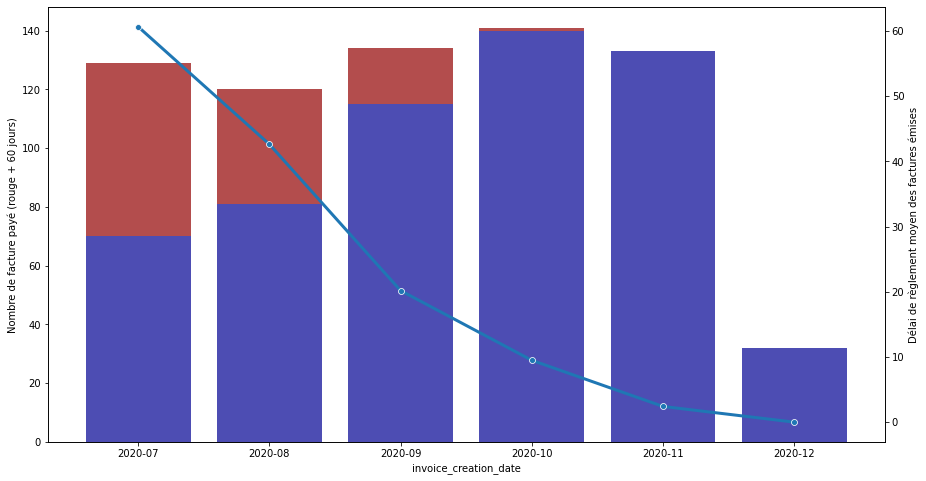

In [14]:
plt.figure(figsize = (15,8))

ax = sns.barplot(x="invoice_creation_date", y="hors delai", data=df2, color='red', saturation=0.4, label="hors delai")
sns.barplot(x="invoice_creation_date", y="en delai", data=df2, color='blue', saturation=0.4, label="Positive")
ax.set(ylabel='Nombre de facture payé (rouge + 60 jours)')
ax2 = plt.twinx()
ax2.set(ylabel='Délai de règlement moyen des factures émises')

sns.lineplot(data=df3.delai_reglement, linewidth = 3, marker="o", ax=ax2);

# 7. Enregistre ton notebook !
